In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import gradient_descent, plot_logreg_line, compute_cost, predict_proba, predict_label, normalize_feature

# Part 3 ~ Spam recognition
Logistic regression for mail separation

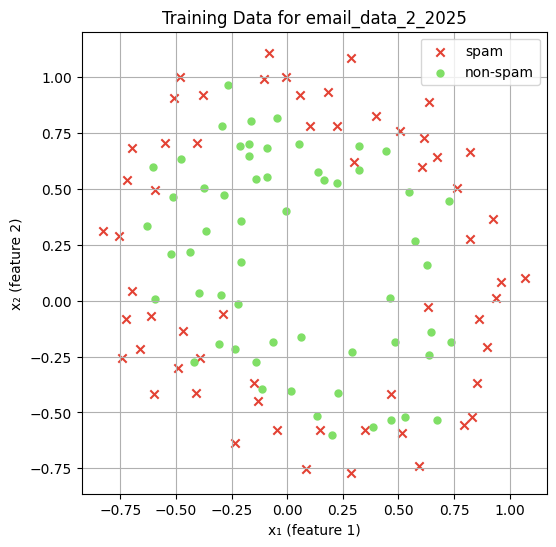

In [11]:
# ~ A ~ #
Xdata = pd.read_csv("data\\email_data_2_2025.csv")
data = Xdata.to_numpy()
X_orig = data[:, :2]  
y = data[:,  2] # labels: 0 = spam, 1 = non-spam

x1 = X_orig[:, 0]
x2 = X_orig[:, 1]

plt.figure(figsize=(6,6))
plt.scatter(x1[y == 0], x2[y == 0], c='#e34234',   marker='x', label='spam')
plt.scatter(x1[y == 1], x2[y == 1], c='#80df66', marker='o',s=25, label='non-spam')
plt.xlabel('x₁ (feature 1)')
plt.ylabel('x₂ (feature 2)')
plt.title('Training Data for email_data_2_2025')  
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# ~ B ~ # 
m = X_orig.shape[0]
X_bias = np.concatenate([np.ones((m,1)), X_orig], axis=1)
y_col = y.reshape(-1, 1)

theta0 = np.zeros((X_bias.shape[1], 1))
alpha  = 0.1
iters  = 1000

theta_lin, J_hist = gradient_descent(X_bias, y_col, theta0, alpha, iters, log_cost=True)
preds = predict_label(X_bias, theta_lin).flatten() 
accuracy = (preds == y).mean() * 100

print("learned θ (θ₀, θ₁, θ₂):", theta_lin.flatten())
print(f"training accuracy: {accuracy:.2f}%")

learned θ (θ₀, θ₁, θ₂): [-0.01440045 -0.30250532 -0.01748818]
training accuracy: 55.08%


As we see using logistic regression model - just with 2 features - achives about 55% --> barely better then random guessing showing there is no clear separation between spam & non-spam mails.
A straight decision boundary is therefore inffective and we must expand our feature set to get meaningful classifier.